In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

%matplotlib inline

In [4]:
X = np.array([-1.000, -.600, -.467, -.200, -.067])
Y = np.array([  .038,  .100,  .155,  .500,  .900])

In [62]:
def interpolar(x, X, Y):
    # Para cada j en [0,n]
    # D = X[j] - X[X != X[j]] son las diferencias (xj - xk) para toda k  en [0,n] y k != j
    # w = np.prod(D) es la multiplicatoria de las diferencias
    # luego tomamos su inversa W = w^-1
    w = [np.prod(X[j] - X[X != X[j]]) for j in range(len(X))]
    W = np.power(np.array(w), -1)
    
    # diff = x - X es la diferencia x - xj para cada j en [0, n]
    diff = x - X
    
    # Numerador
    # W*Y/diff es calcular (wj * f(xj))/(x - xj) para cada j en [0, n]
    # Luego realizamos la sumatoria entre estos valores
    num = np.sum(W*Y / diff)
    
    # Denominador
    # De la misma forma calculamos para el denominador W/diff 
    # equivalente a wj/(x - xj) para cada j en [0, n]
    # y sumamos los valores
    den = np.sum(W / diff)
    
    # finalmente retornamos la division
    return num/den

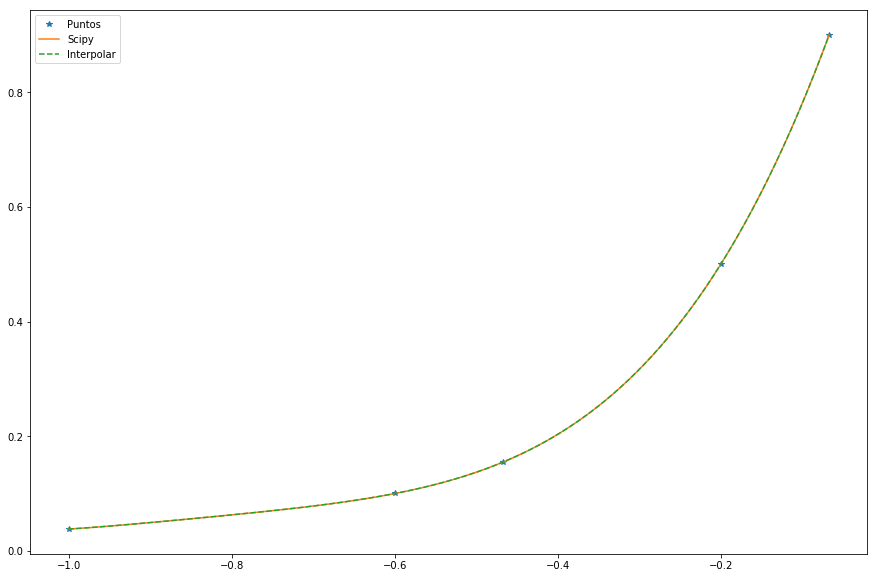

In [66]:
f = interpolate.BarycentricInterpolator(X, Y)
F = interpolar

nX = np.linspace(-1.001,-0.06701,num=100)
nY = f(nX)

mY = np.array([F(x, X, Y) for x in nX if x not in X]) 

plt.figure(figsize=(15, 10))
plt.plot(X,Y, "*", nX,nY, "-", nX, mY, "--")
plt.legend(["Puntos", "Scipy", "Interpolar"])
plt.show()

In [88]:
def secMethod(f, x0, x1, epsilon):
    x2 = x1
    iterations = 0
    while abs(f(x2)) > epsilon and iterations < 1000000:
        # Metodo de la secante
        f0 = f(x0)
        f1 = f(x1)
        x2 = x1 - (f1*(x1 - x0))/(f1 - f0)
        
        # Contamos las iteraciones para no entrar en un bucle infinito
        iterations += 1
        
        # Actualizamos los valores
        x0, x1 = x1, x2
    return x2

In [93]:
secMethod(lambda x: x**3, -2.0, 6.0, 1E-10)

-0.0004191439257133407

In [95]:
_93**3

-7.363588826772676e-11